In [93]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
import torch.nn.functional as F 
import torchvision
from time import time
from torchvision import datasets,transforms
from torch import nn,optim

transform = transforms.ToTensor() # definindo a conversão de imagens para tensor 

trainset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carrega a parte de treino do dataset 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data', download=True, train=False, transform=transform) # Carrega parte de validação do dataset 
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes 



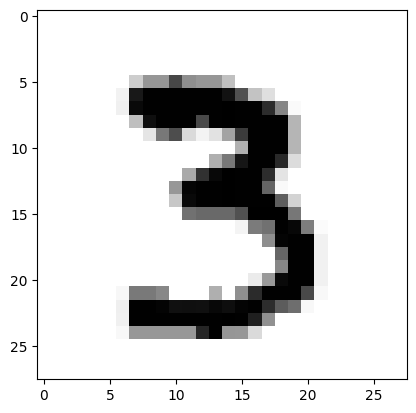

In [94]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(),cmap='gray_r');

In [95]:
print(imagens[0].shape) # Para verificar as dimensões do tensor de cada imagem 
print(etiquetas[0].shape) # Para verificar as dimensões do tensor de cada etiqueta 

torch.Size([1, 28, 28])
torch.Size([])


In [96]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) # camada de entrada, 784 neurônios que se ligam a 128
        self.linear2 = nn.Linear(128, 64) # Camada interna 1, 128 neurônios que se ligam a 64
        self.linear2 = nn.Linear(64, 10) # Camada interna 2, 64 neurônios que se ligam a 10
        # para a camada de saida não é necessario definir nada pois só precisamos pegar o output da camada interna 2

def forward(self,X):
    X = F.relu(self.linear1(X)) # função de ativação da camada de entrada para a camada interna 1 
    X = F.relu(self.linear2(X)) # função de ativação da camada interna 1 para a camada interna 2 
    X = self.linear3(X) # Função de ativação da camada interna 2 para a camada de saida, nesse caso f(x) = x
    return F.log_softmax(X, dim=1) # Dados utilizados para calcular a perda       
    

In [97]:
def treino(modelo, trainloader, device):
    
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # defina a política de atualizaçãi dos pesos e das bias
    inicio = time() # timer para sabermos quanto tempo levou o treino
    
    criterio = nn.NLLLoss() #definindo o criterio para calcular a perda
    EPOCHS = 10 # numero de epochs que o algoritmo rodará
    modelo.train() # ativando o modo de treinamento do modelo 
    
    for epoch in range(EPOCHS):
        perda_acumulada = 0 # inicialização da perda acumulada da epoch em questão
        
        for imagens, etiquetas, in trainloader:
            
            imagens = imagens.view(imagens.shape[0], -1) # convertendo as imagens para "vetores" de 28*28 casas para ficarem compativeis com a  
            otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior 
            
            output = modelo(imagens.to(device)) #colocando os dados no modelo 
            perda_instantanea = criterio(output, etiquetas.to(device)) # calculando a perda da epoch em questão
            
            perda_instantanea.backward() #back propagation a partir da perda 
            
            otimizador.step() #atualizando os pesos e a bias 
            
            perda_acumulada += perda_instantanea.item() # atualização da perda perda_acumulada
        
        else:
            print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\n Tempo de treino (em minutos) =", (time()-inicio/60))

In [98]:
def validacao(modelo, valloader, device):
    conta_corretas, conta_todos = 0, 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)
            # desativar o autoograd para acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamento
            with torch.no_grad():
                logps = modelo(img.to(device)) #output do modelo em escala logaritmica
                
        ps = torch.exp(logps) #converte o output para escala normal(lembrando que é um tensor)
        probab = list(ps.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab)) # converte o tensor em número, no cadom o número que o modelo previu
        etiqueta_certa = etiquetas.numpy()[i]
        if (etiqueta_certa == etiqueta_pred): # Compara a previsão com o valor correto
            conta_corretas += 1 
        conta_todos += 1 
        
    print("Total de imagens testadas =", conta_todos)
    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todos))
         

In [99]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)